In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset 1 - Salary_Data

In [44]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.shape

(30, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


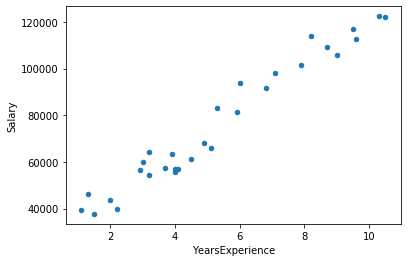

In [8]:
data.plot(x= "YearsExperience", y = "Salary", kind = "scatter")

#### Conclusion
1. Target Variable - Salary, Independent var - YearsExp
2. There are 30 datapoints present.
3. Scatter plot of Data shows it is linearly increasing

#### Prediction Without Standardization

In [45]:
X = data.iloc[:,0:1].values
y = data.iloc[:,1].values

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
X_train.shape

(20, 1)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [27]:
print(y_pred)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


In [28]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
print(sqrt(mse(y_test, y_pred)))

4585.4157204675885


#### Prediction with Standardization

In [29]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [30]:
X = data.iloc[:,0:1].values
y = data.iloc[:,1].values

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)
X_train.shape

(20, 1)

In [35]:
from sklearn.preprocessing import StandardScaler

scl_x = StandardScaler()
X_train = scl_x.fit_transform(X_train)
X_test = scl_x.transform(X_test)

y_train = y_train.reshape(-1, 1)
scl_y = StandardScaler()
y_train = scl_y.fit_transform(y_train)

In [37]:
y_train

array([[-0.58893482],
       [-0.20450235],
       [-0.26937302],
       [-0.40591269],
       [ 1.75238875],
       [ 0.84837657],
       [-1.01636869],
       [ 2.08247565],
       [-0.44526921],
       [-1.27495041],
       [ 0.42348183],
       [ 0.93855664],
       [-0.56653314],
       [-0.67891012],
       [ 1.41533972],
       [-1.12612463],
       [-1.29739304],
       [ 1.11600906],
       [-0.12632172],
       [-0.5760344 ]])

In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

y_pred = scl_y.inverse_transform(y_pred)

In [43]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
print(sqrt(mse(y_test, y_pred)))

4585.41572046759


#### Conclusion 
We get the same result in both the cases

### Other Linear Models

In [47]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
from math import sqrt
print(sqrt(mse(y_test, y_pred)))

4617.255071310498


In [48]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
from math import sqrt
print(sqrt(mse(y_test, y_pred)))

4585.470395306203


In [49]:
from sklearn.linear_model import ElasticNet

model = ElasticNet()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
from math import sqrt
print(sqrt(mse(y_test, y_pred)))

5338.4537088570505
